<h1 style="font-size:35px; font-family: 'verdana';text-align:center;background-color:DodgerBlue;color:white; letter-spacing: 0.1em;">House Price Prediction 🏡</h1>



In [1]:
import pymongo
import pandas as pd
from pymongo import MongoClient
import warnings
warnings.filterwarnings("ignore", category=Warning)


<h1 style="font-family: 'verdata';font-size:28px;background-color:powderblue;text-align:center; letter-spacing: 0.08em;">Reading data from Mongodb</h1>

In [2]:
#point the client at mongo URI
client = pymongo.MongoClient("mongodb://localhost:27017/")

#select database
db = client["Project"]

#select the collection within the database
x =db["Housing_Data"].find()

In [3]:
#converting Collection into Pandas database
Df=pd.DataFrame(x)
Df.head()

,_id,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,6251841689a6ee6b61b0371b,1,60,RL,65,8450,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,6251841689a6ee6b61b0371c,2,20,RL,80,9600,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,6251841689a6ee6b61b0371d,3,60,RL,68,11250,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,6251841689a6ee6b61b0371e,4,70,RL,60,9550,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,6251841689a6ee6b61b0371f,5,60,RL,84,14260,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [4]:
df=Df.drop('_id',axis=1)

In [5]:
df.shape

(1460, 81)

<h1 style="font-family: 'verdata';font-size:28px;background-color:powderblue;text-align:center; letter-spacing: 0.08em;">Importing the Essential Libraries, Metrics</h1>

In [6]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.model_selection import GridSearchCV,cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

<h1 style="font-family: 'verdata';font-size:28px;background-color:powderblue;text-align:center; letter-spacing: 0.08em;">Exploratory Data Analysis</h1>

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


***Checking the shape—i.e. size—of the data***

In [8]:
df.shape

(1460, 81)

***Learning the dtypes of columns' and how many non-null values are there in those columns***

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

***Getting the statistical summary of dataset***

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0


<h1 style="font-family: 'verdata';font-size:28px;background-color:powderblue;text-align:center; letter-spacing: 0.08em;">Feature Selection</h1>

***We are selecting numerical features which have more than 0.50 or less than -0.50 correlation rate based on Pearson Correlation Method—which is the default value of parameter "method" in corr() function. As for selecting categorical features, I selected the categorical values which I believe have significant effect on the target variable such as Heating and MSZoning.***

In [11]:
important_num_cols1 = list(df.corr()["SalePrice"][(df.corr()["SalePrice"]>0.50) | (df.corr()["SalePrice"]<-0.50)].index)
important_num_cols2 = ["LotArea","MSSubClass"]
cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
important_num_cols = important_num_cols1 + important_num_cols2
important_cols = important_num_cols + cat_cols

df = df[important_cols]

In [12]:
df.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice', 'LotArea', 'MSSubClass', 'MSZoning', 'Utilities',
       'BldgType', 'Heating', 'KitchenQual', 'SaleCondition', 'LandSlope'],
      dtype='object')

***Checking for the missing values***

In [13]:
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
OverallQual      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
GarageCars       0
GarageArea       0
SalePrice        0
LotArea          0
MSSubClass       0
MSZoning         0
Utilities        0
BldgType         0
Heating          0
KitchenQual      0
SaleCondition    0
LandSlope        0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


<h1 style="font-family: 'verdata';font-size:28px;background-color:powderblue;text-align:center; letter-spacing: 0.08em;">X, y Split</h1>

***Splitting the data into X and y chunks***

In [14]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

<h1 style="font-family: 'verdata';font-size:28px;background-color:powderblue;text-align:center; letter-spacing: 0.08em;">One-Hot Encoding</h1>

***Encoding the categorical features in X dataset by using One-Hot Encoding method***

In [15]:
X = pd.get_dummies(X,prefix="",prefix_sep='', columns=cat_cols)

In [16]:
X

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,TA,Abnorml,AdjLand,Alloca,Family,Normal,Partial,Gtl,Mod,Sev
0,7,2003,2003,856,856,1710,2,8,2,548,...,0,0,0,0,0,1,0,1,0,0
1,6,1976,1976,1262,1262,1262,2,6,2,460,...,1,0,0,0,0,1,0,1,0,0
2,7,2001,2002,920,920,1786,2,6,2,608,...,0,0,0,0,0,1,0,1,0,0
3,7,1915,1970,756,961,1717,1,7,3,642,...,0,1,0,0,0,0,0,1,0,0
4,8,2000,2000,1145,1145,2198,2,9,3,836,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,...,1,0,0,0,0,1,0,1,0,0
1456,6,1978,1988,1542,2073,2073,2,7,2,500,...,1,0,0,0,0,1,0,1,0,0
1457,7,1941,2006,1152,1188,2340,2,9,1,252,...,0,0,0,0,0,1,0,1,0,0
1458,5,1950,1996,1078,1078,1078,1,5,1,240,...,0,0,0,0,0,1,0,1,0,0


In [17]:
important_num_cols.remove("SalePrice")

In [18]:
X[important_num_cols]

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,LotArea,MSSubClass
0,7,2003,2003,856,856,1710,2,8,2,548,8450,60
1,6,1976,1976,1262,1262,1262,2,6,2,460,9600,20
2,7,2001,2002,920,920,1786,2,6,2,608,11250,60
3,7,1915,1970,756,961,1717,1,7,3,642,9550,70
4,8,2000,2000,1145,1145,2198,2,9,3,836,14260,60
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,7917,60
1456,6,1978,1988,1542,2073,2073,2,7,2,500,13175,20
1457,7,1941,2006,1152,1188,2340,2,9,1,252,9042,70
1458,5,1950,1996,1078,1078,1078,1,5,1,240,9717,20


<h1 style="font-family: 'verdata';font-size:28px;background-color:powderblue;text-align:center; letter-spacing: 0.08em;">Train-Test Split</h1>

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
models = pd.DataFrame(columns=["Model","Training R2 score","Test R2 score"])

<h1 style="font-family: 'verdata';font-size:28px;background-color:powderblue;text-align:center; letter-spacing: 0.08em;",style="font-size:400%;">Machine Learning Models</h1>

<h2 style="font-family: 'verdana'; letter-spacing: 0.05em;">Linear Regression</h2>

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
kfold = KFold(n_splits=5,shuffle=True,random_state=2021)
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

LRcv = GridSearchCV(estimator=model, param_grid=parameters,cv=kfold,scoring='r2')

LRcv.fit(X_train, y_train)

print("Best Paramter :",LRcv.best_params_)
print("Training score :",LRcv.best_score_)
y_pred = LRcv.predict(X_test)
print("Test score :",r2_score(y_test, y_pred))

new_row = {"Model": "Linear","Training R2 score":LRcv.best_score_, "Test R2 score":r2_score(y_test, y_pred)}
models = models.append(new_row, ignore_index=True)

Best Paramter : {'copy_X': True, 'fit_intercept': True, 'normalize': False}
Training score : 0.7689007880462091
Test score : 0.8204787705397114


<h2 style="font-family: 'verdana'; letter-spacing: 0.05em;">Ridge Regression</h2>

In [22]:
from sklearn.linear_model import Ridge

model = Ridge()
kfold = KFold(n_splits=5,shuffle=True,random_state=2021)
parameters = {'alpha': [1,0.1,0.01,0.001,0.0001,10]}

Rcv = GridSearchCV(estimator=model, param_grid=parameters,cv=kfold,scoring='r2')

Rcv.fit(X_train, y_train)

print("Best Paramter :",Rcv.best_params_)
print("Training score :",Rcv.best_score_)
y_pred = Rcv.predict(X_test)
print("Test score :",r2_score(y_test, y_pred))

new_row = {"Model": "Ridge","Training R2 score":Rcv.best_score_, "Test R2 score":r2_score(y_test, y_pred)}
models = models.append(new_row, ignore_index=True)

Best Paramter : {'alpha': 10}
Training score : 0.7710825799921589
Test score : 0.8240977400487202


<h2 style="font-family: 'verdana'; letter-spacing: 0.05em;">Lasso Regression</h2>

In [23]:
from sklearn.linear_model import Lasso

model = Lasso()
kfold = KFold(n_splits=5,shuffle=True,random_state=2021)
parameters ={"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]}
Lcv = GridSearchCV(estimator=model, param_grid=parameters,cv=kfold,scoring='r2')

Lcv.fit(X_train, y_train)

print("Best Paramter :",Lcv.best_params_)
print("Training score :",Lcv.best_score_)
y_pred = Lcv.predict(X_test)
print("Test score :",r2_score(y_test, y_pred))

new_row = {"Model": "Lasso","Training R2 score":Lcv.best_score_, "Test R2 score":r2_score(y_test, y_pred)}
models = models.append(new_row, ignore_index=True)

Best Paramter : {'alpha': 10}
Training score : 0.769727514462525
Test score : 0.820861082849849


<h2 style="font-family: 'verdana'; letter-spacing: 0.05em;">Elastic Net</h2>

In [24]:
from sklearn.linear_model import ElasticNet

model = ElasticNet()
kfold = KFold(n_splits=5,shuffle=True,random_state=2021)
parameters = {'alpha': [1,0.1,0.01,0.001,10] }

ENcv = GridSearchCV(estimator=model, param_grid=parameters,cv=kfold,scoring='r2')

ENcv.fit(X_train, y_train)

print("Best Paramter :",ENcv.best_params_)
print("Training score :",ENcv.best_score_)
y_pred = ENcv.predict(X_test)
print("Test score :",r2_score(y_test, y_pred))

new_row = {"Model": "Elastic Net","Training R2 score":ENcv.best_score_, "Test R2 score":r2_score(y_test, y_pred)}
models = models.append(new_row, ignore_index=True)

Best Paramter : {'alpha': 0.01}
Training score : 0.770679370900304
Test score : 0.823552418806611


<h2 style="font-family: 'verdana'; letter-spacing: 0.05em;">Decision Tree Regression</h2>

In [25]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
kfold = KFold(n_splits=5,shuffle=True,random_state=2021)
#parameters = {'max_depth':[6,8,10],'min_samples_split':[3,5,7],'min_samples_leaf':[3,4,5] }
parameters = {'max_depth':[x for x in range(10,20)],
              'min_samples_split':[x for x in range(10,16)],
              'min_samples_leaf':[x for x in range(8,16)]}
DTcv = GridSearchCV(estimator=model, param_grid=parameters,cv=kfold,scoring='r2')

DTcv.fit(X_train, y_train)

print(DTcv.best_params_)
print("Training score :",DTcv.best_score_)
y_pred = DTcv.predict(X_test)
print("Test score :",r2_score(y_test, y_pred))

new_row = {"Model": "DecisionTree","Training R2 score" :DTcv.best_score_, "Test R2 score":r2_score(y_test, y_pred)}
models = models.append(new_row, ignore_index=True)

{'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 10}
Training score : 0.7705850222777458
Test score : 0.7935426598575704


<h2 style="font-family: 'verdana'; letter-spacing: 0.05em;">RandomForestRegressor</h2> 

In [26]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
kfold = KFold(n_splits=5,shuffle=True,random_state=2021)
parameters = {'max_depth':[5,6],'min_samples_split':[4,5],'min_samples_leaf':[4,5] }

RFcv = GridSearchCV(estimator=model, param_grid=parameters,cv=kfold,scoring='r2')

RFcv.fit(X_train, y_train)

print(RFcv.best_params_)
print("Training score :",RFcv.best_score_)
y_pred = RFcv.predict(X_test)
print("Test score :",r2_score(y_test, y_pred))

new_row = {"Model": "RandomForest","Training R2 score":RFcv.best_score_, "Test R2 score":r2_score(y_test, y_pred)}
models = models.append(new_row, ignore_index=True)

{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 5}
Training score : 0.8219504905293091
Test score : 0.8649320267316851


<h2 style="font-family: 'verdana'; letter-spacing: 0.05em;">XGBoost Regressor</h2>

In [27]:
from xgboost import XGBRegressor

xb=XGBRegressor(random_state=2021,use_label_encoder=False)
kfold=KFold(n_splits=5,random_state=2021,shuffle=True)
parameters={'max_depth':[5,6,7],'n_estimators':[10,15],'learning_rate':[0.4,0.5,0.6]}
XGBcv = GridSearchCV(xb, param_grid=parameters,cv=kfold,verbose=3)

XGBcv.fit(X_train, y_train)

print(XGBcv.best_params_)
print("Training score :",XGBcv.best_score_)
y_pred = XGBcv.predict(X_test)
print("Test score :",r2_score(y_test, y_pred))

new_row = {"Model": "XGBRegressor","Training R2 score":XGBcv.best_score_, "Test R2 score":r2_score(y_test, y_pred)}
models = models.append(new_row, ignore_index=True)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END learning_rate=0.4, max_depth=5, n_estimators=10;, score=0.857 total time=   0.1s
[CV 2/5] END learning_rate=0.4, max_depth=5, n_estimators=10;, score=0.820 total time=   0.0s
[CV 3/5] END learning_rate=0.4, max_depth=5, n_estimators=10;, score=0.861 total time=   0.0s
[CV 4/5] END learning_rate=0.4, max_depth=5, n_estimators=10;, score=0.842 total time=   0.0s
[CV 5/5] END learning_rate=0.4, max_depth=5, n_estimators=10;, score=0.745 total time=   0.0s
[CV 1/5] END learning_rate=0.4, max_depth=5, n_estimators=15;, score=0.854 total time=   0.0s
[CV 2/5] END learning_rate=0.4, max_depth=5, n_estimators=15;, score=0.832 total time=   0.0s
[CV 3/5] END learning_rate=0.4, max_depth=5, n_estimators=15;, score=0.868 total time=   0.0s
[CV 4/5] END learning_rate=0.4, max_depth=5, n_estimators=15;, score=0.843 total time=   0.0s
[CV 5/5] END learning_rate=0.4, max_depth=5, n_estimators=15;, score=0.743 total time=   0.0s

[CV 3/5] END learning_rate=0.6, max_depth=7, n_estimators=15;, score=0.840 total time=   0.0s
[CV 4/5] END learning_rate=0.6, max_depth=7, n_estimators=15;, score=0.809 total time=   0.0s
[CV 5/5] END learning_rate=0.6, max_depth=7, n_estimators=15;, score=0.687 total time=   0.0s
{'learning_rate': 0.4, 'max_depth': 5, 'n_estimators': 15}
Training score : 0.8278474965877635
Test score : 0.8882094737120133


In [29]:
#import pickle

#pickle.dump(df,open('df.pkl','wb'))
#pickle.dump(pipe,open('pipe.pkl','wb'))

<h1 style="font-family: 'verdata';font-size:28px;background-color:powderblue;text-align:center; letter-spacing: 0.08em;">Model Comparison</h1>

In [30]:
comp=models.sort_values(by="Test R2 score",ascending=False)
comp

,Model,Training R2 score,Test R2 score
6,XGBRegressor,0.827847,0.888209
5,RandomForest,0.821950,0.864932
1,Ridge,0.771083,0.824098
3,Elastic Net,0.770679,0.823552
2,Lasso,0.769728,0.820861
0,Linear,0.768901,0.820479
4,DecisionTree,0.770585,0.793543


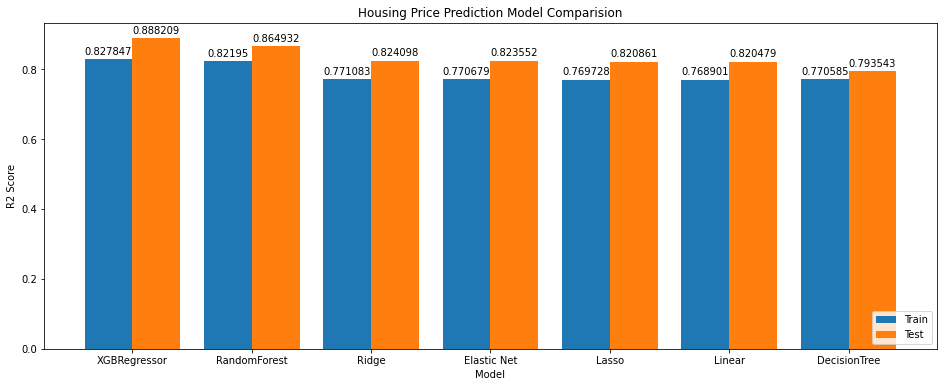

In [31]:
import numpy as np
import matplotlib.pyplot as plt

#algo = ["XGBRegressor","RandomForest","DecisionTree","Ridge","Elastic Net","Lasso","Linear"]
algo= comp["Model"]
Train_Score = comp['Training R2 score'].head(200)
Test_score = comp['Test R2 score'].head(200)

X_axis = np.arange(len(algo))
width = 0.35

plt.figure(figsize=(16,6))
Train=plt.bar(X_axis - 0.2,Train_Score, 0.4, label = 'Train')
Test=plt.bar(X_axis + 0.2,Test_score, 0.4, label = 'Test')

plt.xticks(X_axis, algo)
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.title("Housing Price Prediction Model Comparision")

plt.bar_label(Train, padding=3)
plt.bar_label(Test, padding=3)

plt.legend(loc='lower right')
plt.show()